In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Sushil Sangraula',
 'Jason Banu',
 'Ananta Bhatt',
 'Rohan Gheshing',
 'Peter Akhtar',
 'Gagan Iteni',
 'Anjan Buddathoki',
 'Aashish Hyanmikha',
 'Bibek Huzdar',
 'Paulo Anwar']

In [7]:
total_customer = 30000
male_percent = 58

male = {'name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'gender'
] = 'Prefer not to say'

In [11]:
df.gender.value_counts()

Male                 15673
Female               11188
Other                 2057
Prefer not to say     1082
Name: gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['email'] = df.name.apply(email_gen)

In [14]:
df

,name,gender,email
0,Pusendra Baisyet,Other,pusendra.baisyet@fakeemail.com
1,Saroj vatsa Chhusyabaga,Male,saroj.vatsa@fakeemail.com
2,Santosh Neuapne,Male,santosh.neuapne@fakeemail.com
3,Nirajan Mohapal,Prefer not to say,nirajan.mohapal@fakeemail.com
4,Kamal Rarbhandari,Male,kamal.rarbhandari@fakeemail.com
...,...,...,...
12595,Reeya Kuwar,Female,reeya.kuwar@fakeemail.com
12596,Sarita Uppadhaya,Female,sarita.uppadhaya@fakeemail.com
12597,Vivi Jimee,Other,vivi.jimee@fakeemail.com
12598,Sunita Chhawa,Female,sunita.chhawa@fakeemail.com


In [15]:
df['phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,name,gender,email,phone
0,Pusendra Baisyet,Other,pusendra.baisyet@fakeemail.com,9841176234
1,Saroj vatsa Chhusyabaga,Male,saroj.vatsa@fakeemail.com,9841100671
2,Santosh Neuapne,Male,santosh.neuapne@fakeemail.com,9841855809
3,Nirajan Mohapal,Prefer not to say,nirajan.mohapal@fakeemail.com,9841980472
4,Kamal Rarbhandari,Male,kamal.rarbhandari@fakeemail.com,9841637222
...,...,...,...,...
12595,Reeya Kuwar,Female,reeya.kuwar@fakeemail.com,9841327044
12596,Sarita Uppadhaya,Female,sarita.uppadhaya@fakeemail.com,9841373337
12597,Vivi Jimee,Other,vivi.jimee@fakeemail.com,9841458382
12598,Sunita Chhawa,Female,sunita.chhawa@fakeemail.com,9841530070


In [17]:
df['channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'channel'
] = 'Other'

In [19]:
df

,name,gender,email,phone,channel
0,Pusendra Baisyet,Other,pusendra.baisyet@fakeemail.com,9841176234,Facebook/Ads
1,Saroj vatsa Chhusyabaga,Male,saroj.vatsa@fakeemail.com,9841100671,Word of Mouth
2,Santosh Neuapne,Male,santosh.neuapne@fakeemail.com,9841855809,Google Search
3,Nirajan Mohapal,Prefer not to say,nirajan.mohapal@fakeemail.com,9841980472,Other
4,Kamal Rarbhandari,Male,kamal.rarbhandari@fakeemail.com,9841637222,Other
...,...,...,...,...,...
12595,Reeya Kuwar,Female,reeya.kuwar@fakeemail.com,9841327044,Google Search
12596,Sarita Uppadhaya,Female,sarita.uppadhaya@fakeemail.com,9841373337,Word of Mouth
12597,Vivi Jimee,Other,vivi.jimee@fakeemail.com,9841458382,Word of Mouth
12598,Sunita Chhawa,Female,sunita.chhawa@fakeemail.com,9841530070,Google Search


In [20]:
df.channel.value_counts()

Facebook/Ads     11492
Google Search     8207
Other             5298
Word of Mouth     5003
Name: channel, dtype: int64

In [21]:
df['first_contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'first_contact'
] = 'browser'

In [23]:
df

,name,gender,email,phone,channel,first_contact
0,Pusendra Baisyet,Other,pusendra.baisyet@fakeemail.com,9841176234,Facebook/Ads,browser
1,Saroj vatsa Chhusyabaga,Male,saroj.vatsa@fakeemail.com,9841100671,Word of Mouth,browser
2,Santosh Neuapne,Male,santosh.neuapne@fakeemail.com,9841855809,Google Search,browser
3,Nirajan Mohapal,Prefer not to say,nirajan.mohapal@fakeemail.com,9841980472,Other,browser
4,Kamal Rarbhandari,Male,kamal.rarbhandari@fakeemail.com,9841637222,Other,browser
...,...,...,...,...,...,...
12595,Reeya Kuwar,Female,reeya.kuwar@fakeemail.com,9841327044,Google Search,browser
12596,Sarita Uppadhaya,Female,sarita.uppadhaya@fakeemail.com,9841373337,Word of Mouth,browser
12597,Vivi Jimee,Other,vivi.jimee@fakeemail.com,9841458382,Word of Mouth,browser
12598,Sunita Chhawa,Female,sunita.chhawa@fakeemail.com,9841530070,Google Search,browser


In [24]:
df['first_contact'].value_counts()

browser    25802
app         4198
Name: first_contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,name,gender,email,phone,channel,first_contact
15200,Saroj vatsa Patera,Male,saroj.vatsa@fakeemail.com,9841618454,Other,browser
8778,Karuna Nirolla,Female,karuna.nirolla@fakeemail.com,9841935484,Google Search,app
6305,Sona Khayaju,Female,sona.khayaju@fakeemail.com,9841585006,Facebook/Ads,app
11819,Paulo Mahaseth,Prefer not to say,paulo.mahaseth@fakeemail.com,9841278643,Facebook/Ads,browser
7407,Samita Mahajan,Female,samita.mahajan@fakeemail.com,9841267804,Google Search,browser
...,...,...,...,...,...,...
10671,Prati Noori,Female,prati.noori@fakeemail.com,9841310583,Google Search,browser
15563,Bishal Chanara,Male,bishal.chanara@fakeemail.com,9841807989,Other,browser
6670,Rohit Marsaini,Male,rohit.marsaini@fakeemail.com,9841199387,Other,app
11724,Ananta Pathee,Male,ananta.pathee@fakeemail.com,9841766928,Facebook/Ads,browser


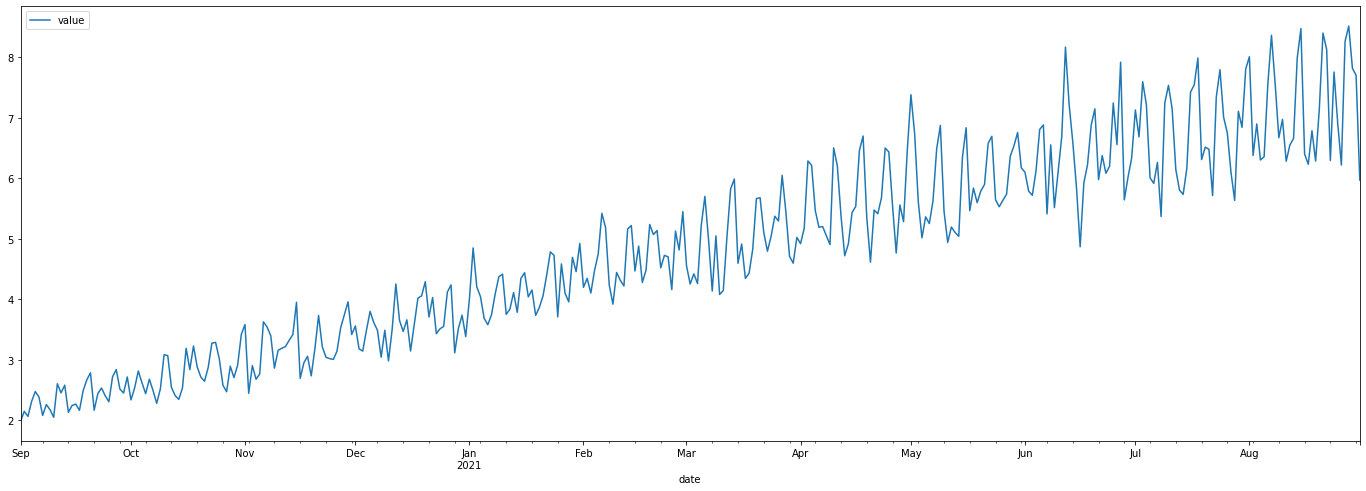

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (10*data.value).astype(int)

In [30]:
data.rows.sum()

17394

In [31]:
data

,date,base_amount,weekend_boost_factor,my_linear_trend,white_noise,total_factor,value,rows
0,2020-09-01,1.0,1.0,2.000000,1.056516,2.113032,2.113032,21
1,2020-09-02,1.0,1.0,2.013699,1.016515,2.046955,2.046955,20
2,2020-09-03,1.0,1.0,2.027397,0.974324,1.975342,1.975342,19
3,2020-09-04,1.0,1.1,2.041096,1.080609,2.426189,2.426189,24
4,2020-09-05,1.0,1.2,2.054795,0.907067,2.236603,2.236603,22
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,1.1,6.931507,0.979355,7.467247,7.467247,74
361,2021-08-28,1.0,1.2,6.945205,0.965355,8.045509,8.045509,80
362,2021-08-29,1.0,1.2,6.958904,1.086332,9.071612,9.071612,90
363,2021-08-30,1.0,1.0,6.972603,0.904782,6.308685,6.308685,63


In [32]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = int (num*1.2)
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = int (num*1.4)
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = int (num*1.4)
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 2)
    return num

In [33]:
data['rows'] = data.apply(nepali_holiday, axis=1)

In [34]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [35]:
final_dates = (data.apply(create_list, axis=1).sum())

In [36]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [37]:
clients['created_at'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_75016/801896566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = final_dates


In [38]:
clients

,name,gender,email,phone,channel,first_contact,created_at
0,Saroj vatsa Patera,Male,saroj.vatsa@fakeemail.com,9841618454,Other,browser,2020-09-01 00:00:00
1,Karuna Nirolla,Female,karuna.nirolla@fakeemail.com,9841935484,Google Search,app,2020-09-01 00:00:00
2,Sona Khayaju,Female,sona.khayaju@fakeemail.com,9841585006,Facebook/Ads,app,2020-09-01 00:00:00
3,Paulo Mahaseth,Prefer not to say,paulo.mahaseth@fakeemail.com,9841278643,Facebook/Ads,browser,2020-09-01 00:00:00
4,Samita Mahajan,Female,samita.mahajan@fakeemail.com,9841267804,Google Search,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
21789,Chhiring Pokharal,Male,chhiring.pokharal@fakeemail.com,9841013843,Other,browser,2021-08-31 00:00:00
21790,Suman Lingden,Other,suman.lingden@fakeemail.com,9841172670,Word of Mouth,browser,2021-08-31 00:00:00
21791,Pramod Gachhadar,Male,pramod.gachhadar@fakeemail.com,9841912537,Word of Mouth,browser,2021-08-31 00:00:00
21792,Ansu Shahu,Female,ansu.shahu@fakeemail.com,9841697135,Word of Mouth,browser,2021-08-31 00:00:00


In [39]:
clients.gender.value_counts()

Male                 11380
Female                8148
Other                 1496
Prefer not to say      770
Name: gender, dtype: int64

In [40]:
clients.channel.value_counts()

Facebook/Ads     8279
Google Search    5990
Other            3898
Word of Mouth    3627
Name: channel, dtype: int64

In [41]:
clients['first_contact'].value_counts()

browser    18707
app         3087
Name: first_contact, dtype: int64

In [42]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [43]:
clients['created_at'] = clients['created_at'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_75016/1294208807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = clients['created_at'].apply(random_times)


In [44]:
clients['client_id'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_75016/781864625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['client_id'] = clients.index + 100000000


In [45]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id
0,Saroj vatsa Patera,Male,saroj.vatsa@fakeemail.com,9841618454,Other,browser,2020-09-01 11:32:23.672943,100000000
1,Karuna Nirolla,Female,karuna.nirolla@fakeemail.com,9841935484,Google Search,app,2020-09-01 14:28:42.013533,100000001
2,Sona Khayaju,Female,sona.khayaju@fakeemail.com,9841585006,Facebook/Ads,app,2020-09-01 15:33:16.952466,100000002
3,Paulo Mahaseth,Prefer not to say,paulo.mahaseth@fakeemail.com,9841278643,Facebook/Ads,browser,2020-09-01 03:20:14.648833,100000003
4,Samita Mahajan,Female,samita.mahajan@fakeemail.com,9841267804,Google Search,browser,2020-09-01 14:41:47.335170,100000004
...,...,...,...,...,...,...,...,...
21789,Chhiring Pokharal,Male,chhiring.pokharal@fakeemail.com,9841013843,Other,browser,2021-08-31 12:53:42.017632,100021789
21790,Suman Lingden,Other,suman.lingden@fakeemail.com,9841172670,Word of Mouth,browser,2021-08-31 14:47:51.042093,100021790
21791,Pramod Gachhadar,Male,pramod.gachhadar@fakeemail.com,9841912537,Word of Mouth,browser,2021-08-31 08:31:09.518596,100021791
21792,Ansu Shahu,Female,ansu.shahu@fakeemail.com,9841697135,Word of Mouth,browser,2021-08-31 19:38:52.098266,100021792


In [46]:
def date_gen(start, end):
    start_date = datetime.date(start, 1, 1)
    end_date = datetime.date(end, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return str(random_date)

In [47]:
dob = [date_gen(1975, 1990) for x in range(clients.shape[0]//5)] + \
[date_gen(1991, 1995) for x in range(clients.shape[0]//5)] + \
[date_gen(1996, 2000) for x in range(clients.shape[0]//2)] + \
[date_gen(2001, 2005) for x in range(clients.shape[0]//2)] + \
[date_gen(2006, 2008) for x in range(clients.shape[0]//5)]

In [48]:
random.shuffle(dob)

In [49]:
clients['dob'] = dob[:clients.shape[0]]

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_75016/1825158366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['dob'] = dob[:clients.shape[0]]


In [50]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Saroj vatsa Patera,Male,saroj.vatsa@fakeemail.com,9841618454,Other,browser,2020-09-01 11:32:23.672943,100000000,2004-01-20
1,Karuna Nirolla,Female,karuna.nirolla@fakeemail.com,9841935484,Google Search,app,2020-09-01 14:28:42.013533,100000001,1997-12-03
2,Sona Khayaju,Female,sona.khayaju@fakeemail.com,9841585006,Facebook/Ads,app,2020-09-01 15:33:16.952466,100000002,1999-07-10
3,Paulo Mahaseth,Prefer not to say,paulo.mahaseth@fakeemail.com,9841278643,Facebook/Ads,browser,2020-09-01 03:20:14.648833,100000003,2005-01-26
4,Samita Mahajan,Female,samita.mahajan@fakeemail.com,9841267804,Google Search,browser,2020-09-01 14:41:47.335170,100000004,2003-01-24
...,...,...,...,...,...,...,...,...,...
21789,Chhiring Pokharal,Male,chhiring.pokharal@fakeemail.com,9841013843,Other,browser,2021-08-31 12:53:42.017632,100021789,1987-12-03
21790,Suman Lingden,Other,suman.lingden@fakeemail.com,9841172670,Word of Mouth,browser,2021-08-31 14:47:51.042093,100021790,2001-03-16
21791,Pramod Gachhadar,Male,pramod.gachhadar@fakeemail.com,9841912537,Word of Mouth,browser,2021-08-31 08:31:09.518596,100021791,2005-09-14
21792,Ansu Shahu,Female,ansu.shahu@fakeemail.com,9841697135,Word of Mouth,browser,2021-08-31 19:38:52.098266,100021792,2006-06-24


In [51]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Saroj vatsa Patera,Male,saroj.vatsa@fakeemail.com,9841618454,Other,browser,2020-09-01 11:32:23.672943,100000000,2004-01-20
1,Karuna Nirolla,Female,karuna.nirolla@fakeemail.com,9841935484,Google Search,app,2020-09-01 14:28:42.013533,100000001,1997-12-03
2,Sona Khayaju,Female,sona.khayaju@fakeemail.com,9841585006,Facebook/Ads,app,2020-09-01 15:33:16.952466,100000002,1999-07-10
3,Paulo Mahaseth,Prefer not to say,paulo.mahaseth@fakeemail.com,9841278643,Facebook/Ads,browser,2020-09-01 03:20:14.648833,100000003,2005-01-26
4,Samita Mahajan,Female,samita.mahajan@fakeemail.com,9841267804,Google Search,browser,2020-09-01 14:41:47.335170,100000004,2003-01-24
...,...,...,...,...,...,...,...,...,...
21789,Chhiring Pokharal,Male,chhiring.pokharal@fakeemail.com,9841013843,Other,browser,2021-08-31 12:53:42.017632,100021789,1987-12-03
21790,Suman Lingden,Other,suman.lingden@fakeemail.com,9841172670,Word of Mouth,browser,2021-08-31 14:47:51.042093,100021790,2001-03-16
21791,Pramod Gachhadar,Male,pramod.gachhadar@fakeemail.com,9841912537,Word of Mouth,browser,2021-08-31 08:31:09.518596,100021791,2005-09-14
21792,Ansu Shahu,Female,ansu.shahu@fakeemail.com,9841697135,Word of Mouth,browser,2021-08-31 19:38:52.098266,100021792,2006-06-24


In [52]:
location = pd.read_csv("../datasets/location.csv")

In [53]:
location = location[['lat', 'lon', 'name']]

In [54]:
location_list =  [location.sample().values.tolist() for x in range(clients.shape[0])]

In [55]:
location_df = pd.DataFrame(location_list)

In [56]:
location_df

,0
0,"[27.7176, 85.3284, Gairidhara Rd]"
1,"[27.6921, 85.3312, Bhakti Thapa Sadak]"
2,"[27.6874, 85.3319, 'We' for Change]"
3,"[27.6943, 85.3062, Sahid Shukra Marg]"
4,"[27.7023, 85.3099, Pako Sadak]"
...,...
21789,"[27.7065, 85.3124, Masa Galli Kathmandu 44600 ..."
21790,"[27.7126, 85.3176, Coffeepasal]"
21791,"[27.716, 85.3131, Hotel Peace N Park]"
21792,"[27.7118, 85.3077, Yapikhya Marg]"


In [57]:
location_df[['lat','lon', 'location_name']] = pd.DataFrame(location_df[0].tolist(), index= location_df.index)

In [58]:
location_df[['lat', 'lon', 'location_name']]

,lat,lon,location_name
0,27.7176,85.3284,Gairidhara Rd
1,27.6921,85.3312,Bhakti Thapa Sadak
2,27.6874,85.3319,'We' for Change
3,27.6943,85.3062,Sahid Shukra Marg
4,27.7023,85.3099,Pako Sadak
...,...,...,...
21789,27.7065,85.3124,Masa Galli Kathmandu 44600 Nepal
21790,27.7126,85.3176,Coffeepasal
21791,27.7160,85.3131,Hotel Peace N Park
21792,27.7118,85.3077,Yapikhya Marg


In [59]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Saroj vatsa Patera,Male,saroj.vatsa@fakeemail.com,9841618454,Other,browser,2020-09-01 11:32:23.672943,100000000,2004-01-20
1,Karuna Nirolla,Female,karuna.nirolla@fakeemail.com,9841935484,Google Search,app,2020-09-01 14:28:42.013533,100000001,1997-12-03
2,Sona Khayaju,Female,sona.khayaju@fakeemail.com,9841585006,Facebook/Ads,app,2020-09-01 15:33:16.952466,100000002,1999-07-10
3,Paulo Mahaseth,Prefer not to say,paulo.mahaseth@fakeemail.com,9841278643,Facebook/Ads,browser,2020-09-01 03:20:14.648833,100000003,2005-01-26
4,Samita Mahajan,Female,samita.mahajan@fakeemail.com,9841267804,Google Search,browser,2020-09-01 14:41:47.335170,100000004,2003-01-24
...,...,...,...,...,...,...,...,...,...
21789,Chhiring Pokharal,Male,chhiring.pokharal@fakeemail.com,9841013843,Other,browser,2021-08-31 12:53:42.017632,100021789,1987-12-03
21790,Suman Lingden,Other,suman.lingden@fakeemail.com,9841172670,Word of Mouth,browser,2021-08-31 14:47:51.042093,100021790,2001-03-16
21791,Pramod Gachhadar,Male,pramod.gachhadar@fakeemail.com,9841912537,Word of Mouth,browser,2021-08-31 08:31:09.518596,100021791,2005-09-14
21792,Ansu Shahu,Female,ansu.shahu@fakeemail.com,9841697135,Word of Mouth,browser,2021-08-31 19:38:52.098266,100021792,2006-06-24


In [60]:
clients = pd.concat([clients, location_df[['lat', 'lon', 'location_name']]], axis=1)

In [61]:
list(clients)

['name',
 'gender',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at',
 'client_id',
 'dob',
 'lat',
 'lon',
 'location_name']

In [64]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
  'lat',
 'lon',
 'location_name',
 'created_at']
].to_csv('../datasets/clients.csv', index=False)